In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt 
from IPython.html.widgets import interact
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
plt.style.use("ggplot")
np.random.seed(123)

In [3]:
mu = np.array([1,2])
cov = np.array([[1.0,0.7], [0.7,1.0]])

In [4]:
x = np.arange(-3,-1,0.5)
y = np.arange(3,4,0.2)
xx, yy = np.meshgrid(x, y)
pos = np.zeros([xx.shape[0], xx.shape[1], 2])
pos[:,:,0] = xx
pos[:,:,1] = yy

In [5]:
pos[:,:,1]

array([[3. , 3. , 3. , 3. ],
       [3.2, 3.2, 3.2, 3.2],
       [3.4, 3.4, 3.4, 3.4],
       [3.6, 3.6, 3.6, 3.6],
       [3.8, 3.8, 3.8, 3.8]])

In [6]:
xx

array([[-3. , -2.5, -2. , -1.5],
       [-3. , -2.5, -2. , -1.5],
       [-3. , -2.5, -2. , -1.5],
       [-3. , -2.5, -2. , -1.5],
       [-3. , -2.5, -2. , -1.5]])

In [7]:
yy

array([[3. , 3. , 3. , 3. ],
       [3.2, 3.2, 3.2, 3.2],
       [3.4, 3.4, 3.4, 3.4],
       [3.6, 3.6, 3.6, 3.6],
       [3.8, 3.8, 3.8, 3.8]])

In [8]:
x = np.arange(-2, 4, 0.01)
y = np.arange(-1, 5, 0.01)
X, Y = np.meshgrid(x, y)
pos = np.zeros([X.shape[0], X.shape[1], 2])
pos[:,:,0] = X
pos[:,:,1] = Y

Text(0, 0.5, '$x_2$')

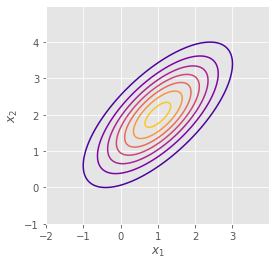

In [9]:
rv = multivariate_normal(mu, cov)
plt.figure(figsize=(4,4))
plt.contour(X, Y, rv.pdf(pos), cmap="plasma")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_2$")

In [10]:
NMCS = 500
sigma12 = cov[1,0]
sigma1 = cov[0,0] ** 0.5
sigma2 = cov[1,1] ** 0.5
rho = sigma12/(sigma1*sigma2)
z1 = 0.0
z2 = 0.0
z1_mcs = [z1]
z2_mcs = [z2]

# Gibbs sampling
for i in range(NMCS):
    # f(z1|z2)
    z1 = norm.rvs(loc=rho*z2, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
    # f(z2|z1)
    z2 = norm.rvs(loc=rho*z1, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)

df1 = pd.DataFrame(mu[0]+np.array(z1_mcs))
df2 = pd.DataFrame(mu[1]+np.array(z2_mcs))

In [11]:
df1.head()

,0
0,1.000000
1,0.224705
2,0.224705
3,1.320765
4,1.320765


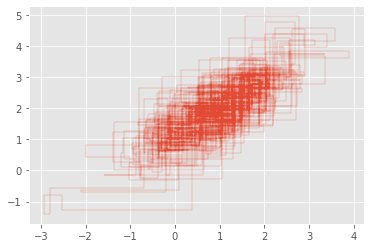

In [12]:
plt.plot(df1[0], df2[0], linewidth=0.24)

In [13]:
@interact(mcs=(0,100,1))
def animation(mcs=0):
    plt.contour(X, Y, rv.pdf(pos), cmap="plasma")
    plt.xlim([-3, 4.5])
    plt.ylim([-1, 5])
    plt.plot(df1[0][:mcs], df2[0][:mcs])
    plt.xlabel("$x_{1}$")
    plt.ylabel("$x_2$")
    plt.show()

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))

Text(0.5, 1.0, 'step=300')

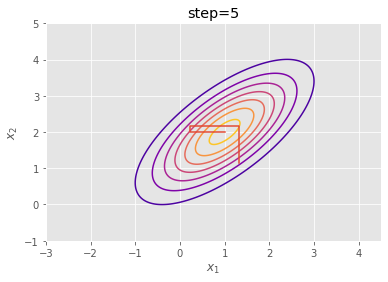

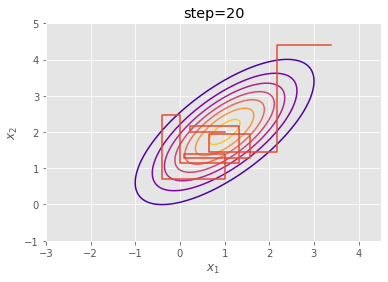

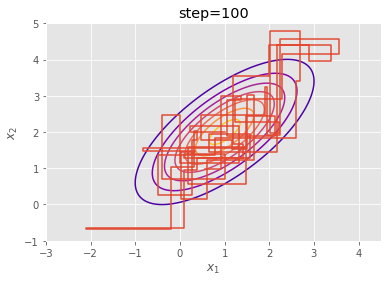

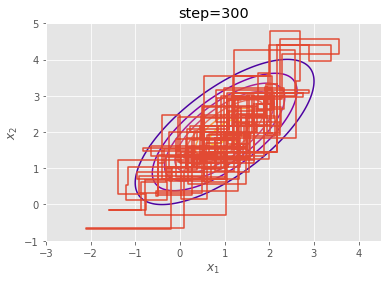

In [14]:
mcs = 100
def animation(mcs=0):
    plt.contour(X, Y, rv.pdf(pos), cmap="plasma")
    plt.xlim([-3, 4.5])
    plt.ylim([-1, 5])
    plt.plot(df1[0][:mcs], df2[0][:mcs])
    plt.xlabel("$x_{1}$")
    plt.ylabel("$x_2$")

    
plt.subplot()
animation(mcs=5)
plt.title("step=5")

plt.subplots()
animation(mcs=20)
plt.title("step=20")

plt.subplots()
animation(mcs=100)
plt.title("step=100")

plt.subplots()
animation(mcs=300)
plt.title("step=300")